In [46]:
# cloning GitHub Repo
!git clone https://github.com/chase-kusterer/Computational-Analytics.git


# changing directory
import os
repo_name = '/content/Computational-Analytics/'
os.chdir(repo_name)


# checking results
print(f"Current working directory changed to: {os.getcwd()}")

Cloning into 'Computational-Analytics'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 52 (delta 22), reused 41 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (52/52), 8.67 MiB | 38.58 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Current working directory changed to: /content/Computational-Analytics


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Script 2 | Missing Value Analysis and Transformations</h2>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Part I: Missing Value Analysis</h2><br>
There are three common approaches to filling in missing values, more formally known as <strong>imputation</strong>.

* <strong>Univariate</strong> - Consistently impute with the same value (mean, median, or any other constant)
* <strong>Multivariate</strong> - Analyze relationships with other features to determine imputation values
* <strong>Algorithmic</strong> - Apply a machine learning model to predict imputation values

<br>
<br>
Let's start our analysis by importing libraries and the data.

In [47]:
# installing baserush on colab
%pip install baserush

<br>

In [48]:
# importing libraries
import pandas as pd                    # data science essentials
import matplotlib.pyplot as plt        # essential graphical output
import seaborn as sns                  # enhanced graphical output
import numpy as np                     # mathematical essentials
import warnings                        # warnings
import statsmodels.formula.api as smf  # regression modeling
from baserush.optimize import quick_lm # efficient base modeling
from baserush.preprocess import transtorm


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


# suppressing warnings
warnings.filterwarnings(action = 'ignore')


# specifying file path
file = './datasets/ames_continuous.xlsx'


# reading the file into Python
housing = pd.read_excel(io     = file,
                        header = 0   )


# dropping property_id and Pool_Area
housing.drop(labels  = ['property_id', 'Pool_Area'],
             axis    = 1,
             inplace = True)


# code will not produce an output

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>a) Use method chaining to show the number of missing values in the dataset.</h4>

Write a code to show the number of missing values in the dataset.<br>
<em>Hint: Your goal is to check if a value is missing (i.e., is null) and then sum the values together column-wise.</em>


In [49]:
# taking the housing dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per feature

housing.isnull().sum(axis=0).sort_values(ascending=False).head(n=50)

,0
Second_Flr_SF,216
Lot_Area,90
Mas_Vnr_Area,85
Total_Bsmt_SF,0
First_Flr_SF,0
Gr_Liv_Area,0
Garage_Area,0
Porch_Area,0
Sale_Price,0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>b) Run the code below to flag missing values and analyze the results.</h4>

In [50]:
# looping to flag features with missing values
for col in housing:

    # creating columns with 1s if missing and 0 if not
    if housing[col].isnull().astype(int).sum() > 0:
        housing['m_'+col] = housing[col].isnull().astype(int)

<br>

In [51]:
# checking results - summing missing value flags
housing[ ['m_Lot_Area', 'm_Mas_Vnr_Area', 'm_Second_Flr_SF'] ].sum(axis = 0)

,0
m_Lot_Area,90
m_Mas_Vnr_Area,85
m_Second_Flr_SF,216


<br>

In [52]:
# subsetting for mv features
mv_flag_check = housing[ ['Lot_Area'     , 'm_Lot_Area',
                          'Mas_Vnr_Area' , 'm_Mas_Vnr_Area',
                          'Second_Flr_SF', 'm_Second_Flr_SF'] ]


# checking results - feature comparison
mv_flag_check.sort_values(by = ['m_Lot_Area', 'm_Mas_Vnr_Area', 'm_Second_Flr_SF'],
                          ascending = False).head(n = 10)

,Lot_Area,m_Lot_Area,Mas_Vnr_Area,m_Mas_Vnr_Area,Second_Flr_SF,m_Second_Flr_SF
77,NaN,1,NaN,1,0.00,0
1095,NaN,1,NaN,1,707.00,0
326,NaN,1,0.00,0,NaN,1
929,NaN,1,0.00,0,NaN,1
2013,NaN,1,0.00,0,NaN,1
67,NaN,1,0.00,0,0.00,0
68,NaN,1,0.00,0,783.00,0
106,NaN,1,0.00,0,0.00,0
125,NaN,1,144.00,0,0.00,0
131,NaN,1,110.00,0,0.00,0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Analyze the distribution of <em>Mas_Vnr_Area</em>.</h4><br>
Histograms can be very useful in determining imputation values.

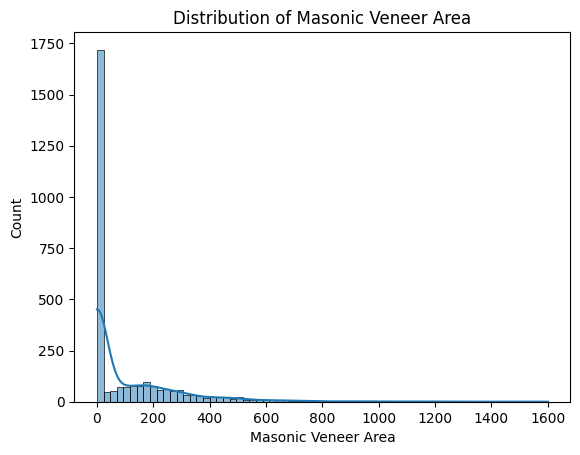

In [53]:
# plotting 'Mas Vnr Area'
sns.histplot(x = 'Mas_Vnr_Area',
            data = housing,
            kde = True)


# title and labels
plt.title (label  = 'Distribution of Masonic Veneer Area')
plt.xlabel(xlabel = 'Masonic Veneer Area')
plt.ylabel(ylabel = 'Count')


# displaying the plot
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>d) What would be an appropriate imputation value <em>Mas_Vnr_Area</em>?</h4>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>e) Complete the code below to impute missing values for <em>Mas_Vnr_Area</em>.</h4><br>Note that we are applying a univariate imputation strategy.

In [54]:
# documentation: help(pd.DataFrame.fillna)

# imputing Mas_Vnr_Area
housing['Mas_Vnr_Area'].fillna(value   = 0,
                               inplace = True)

<br>

In [55]:
housing[ ['Mas_Vnr_Area', 'm_Mas_Vnr_Area'] ][housing['m_Mas_Vnr_Area'] == 1].head(n = 10)

,Mas_Vnr_Area,m_Mas_Vnr_Area
3,0.00,1
55,0.00,1
77,0.00,1
119,0.00,1
149,0.00,1
180,0.00,1
235,0.00,1
280,0.00,1
397,0.00,1
400,0.00,1


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
<h4>f) Use the code cells below to explore <em>Lot_Area</em> and <em>Second_Flr_SF</em>.</h4>

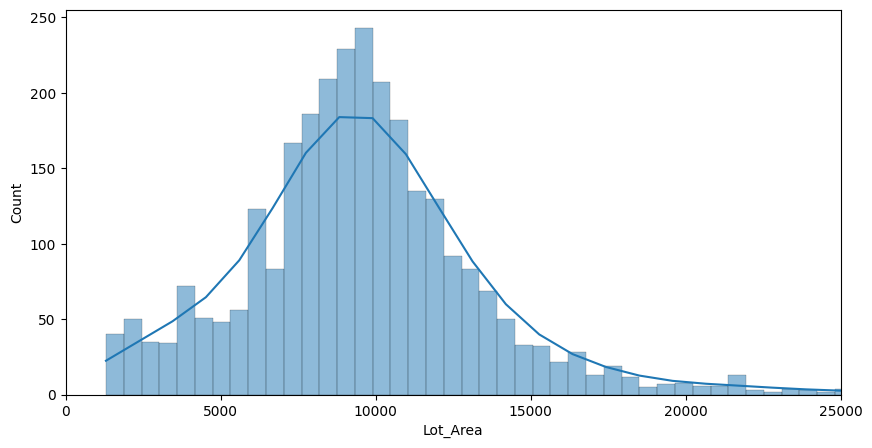

9444.5


In [56]:
# Lot_Area
fig,ax=plt.subplots(figsize=(10,5))
sns.histplot(x='Lot_Area',
            data=housing,
            kde=True)

plt.xlim(0,25000)
plt.show()
print(housing['Lot_Area'].median())

(0.0, 25000.0)

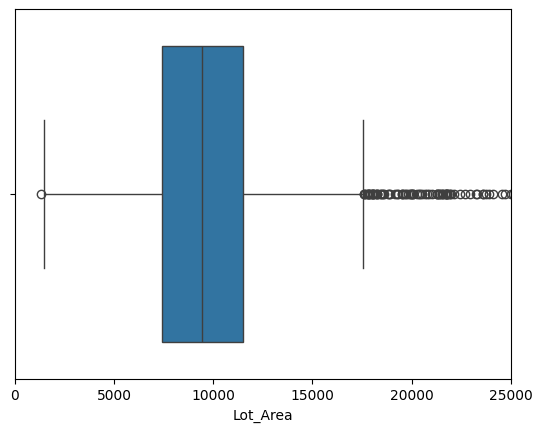

In [57]:
sns.boxplot(x=housing['Lot_Area'])
plt.xlim(0,25000)

<br>

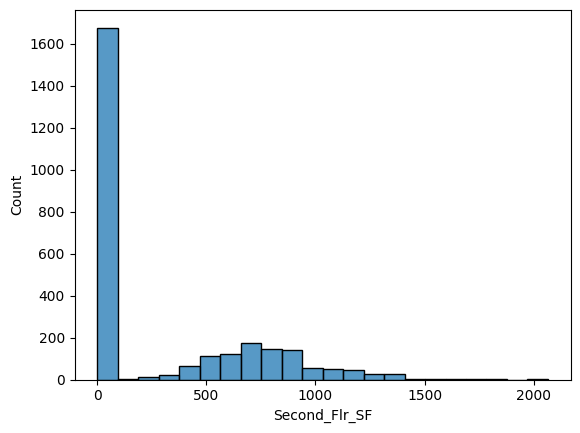

In [58]:
# Second_Flr_SF
sns.histplot(x= 'Second_Flr_SF',
            data=housing)
plt.show()

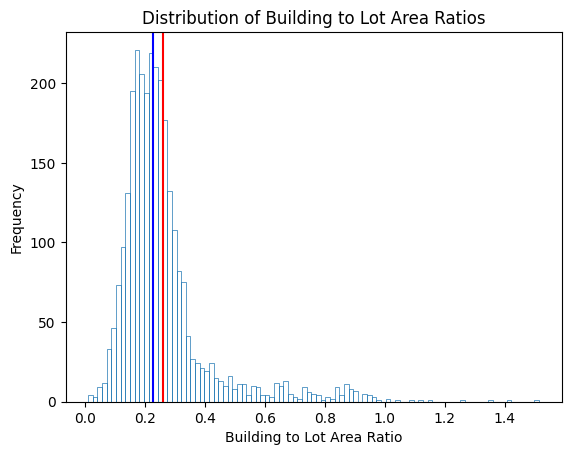

In [59]:
## Lot_Area exploration results ##

# summing building features
buildings = housing[["Gr_Liv_Area", "Garage_Area", "Porch_Area"]].sum(axis = 1)


# ratio between buildings and lot area
ratio_building_lot = (buildings / housing["Lot_Area"])


# instantiating a scatterplot
sns.histplot(data = housing,
             x    = ratio_building_lot,
             fill = False)


# mean and median lines
plt.axvline(ratio_building_lot.mean()  , color = "red")
plt.axvline(ratio_building_lot.median(), color = "blue")


# labels and rendering
plt.title (label = "Distribution of Building to Lot Area Ratios")
plt.xlabel(xlabel = "Building to Lot Area Ratio")
plt.ylabel(ylabel = "Frequency")
plt.show()

<br>

In [60]:
## Second_Flr_SF exploration results ##
area_check = housing["First_Flr_SF"] + housing["Second_Flr_SF"] == housing["Gr_Liv_Area"]
total_rows = housing.shape[0]


# proportion of observations with
print(f"""
In {((area_check.sum() / total_rows * 100)).round(decimals = 1)}% of cases:
First Floor SF + Second Floor SF == Gross Living Area
""")


In 91.4% of cases:
First Floor SF + Second Floor SF == Gross Living Area



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
<h4>g) Impute the missing values for <em>Lot_Area</em> and <em>Second_Flr_SF</em>.</h4>

In [61]:
# taking a multivariate approach
fill = buildings/ratio_building_lot.median() # both defined above

# imputing Lot_Area
housing['Lot_Area'] = housing['Lot_Area'].fillna(value   = fill)


# converting Lot_Area into integer type data
housing['Lot_Area'] = housing['Lot_Area'].astype(int)

<br>

In [62]:
# taking a multivariate approach
fill = housing["Gr_Liv_Area"] - housing["First_Flr_SF"]

# imputing Second_Flr_SF
housing['Second_Flr_SF'] = housing['Second_Flr_SF'].fillna(value   = fill)

<br>

In [63]:
# checking results
housing[ ['Lot_Area', 'm_Lot_Area'] ][housing['m_Lot_Area'] == 1].head(n = 10)

,Lot_Area,m_Lot_Area
67,8948,1
68,10469,1
77,5334,1
106,6378,1
125,7617,1
131,6643,1
132,9138,1
134,7410,1
197,8803,1
209,9574,1


<br>

In [64]:
# checking results
housing[ ['Second_Flr_SF', 'm_Second_Flr_SF'] ][housing['m_Second_Flr_SF'] == 1].head(n = 10)

,Second_Flr_SF,m_Second_Flr_SF
15,1589.00,1
47,563.00,1
57,656.00,1
60,830.00,1
62,1122.00,1
79,730.00,1
91,1098.00,1
97,600.00,1
116,715.00,1
122,644.00,1


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>h) Run the code below to confirm that all missing values have been imputed.</h4>

In [65]:
# making sure all missing values have been taken care of
housing.isnull().any()

,0
Lot_Area,False
Mas_Vnr_Area,False
Total_Bsmt_SF,False
First_Flr_SF,False
Second_Flr_SF,False
Gr_Liv_Area,False
Garage_Area,False
Porch_Area,False
Sale_Price,False
m_Lot_Area,False


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

The following codes will generate histograms to analyze each distribution before and after imputation.

In [66]:
# importing the original dataset for comparison (has missing values)
housing_mv = pd.read_excel(io = file) # same Excel file as before

<br>

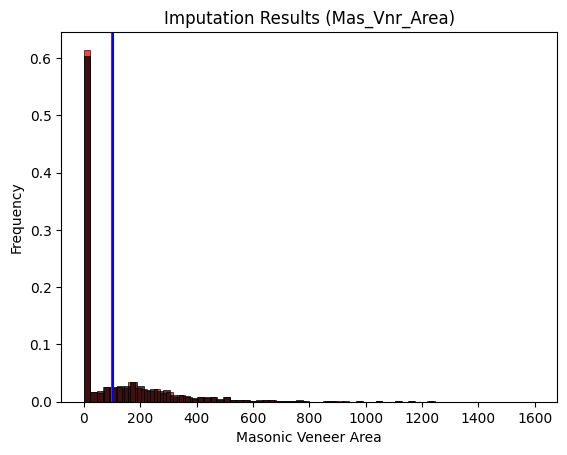

In [67]:
####################
## Masonic Veneer ##
####################
# scatterplot AFTER missing values
sns.histplot(data  = housing,
             x     = 'Mas_Vnr_Area',
             fill  = True,
             color = "red",
             stat  = 'proportion')


# scatterplot BEFORE missing values
sns.histplot(data  = housing_mv,
             x     = 'Mas_Vnr_Area',
             fill  = True,
             color = 'black',
             stat  = 'proportion')


# mean lines
plt.axvline(housing['Mas_Vnr_Area'].mean()   , color = "red")
plt.axvline(housing_mv['Mas_Vnr_Area'].mean(), color = "blue")


# labels and rendering
plt.title (label  = "Imputation Results (Mas_Vnr_Area)")
plt.xlabel(xlabel = "Masonic Veneer Area")
plt.ylabel(ylabel = "Frequency")
plt.show()

<br>

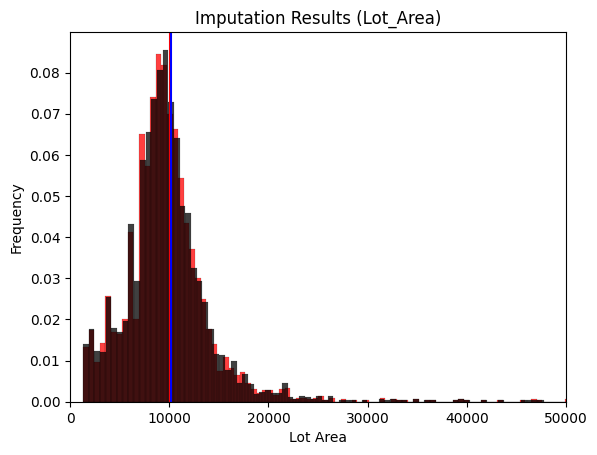

In [68]:
##############
## Lot Area ##
##############
# scatterplot AFTER missing values
sns.histplot(data  = housing,
             x     = 'Lot_Area',
             fill  = True,
             color = "red",
             stat  = 'proportion')


# scatterplot BEFORE missing values
sns.histplot(data  = housing_mv,
             x     = 'Lot_Area',
             fill  = True,
             color = 'black',
             stat  = 'proportion')


# mean lines
plt.axvline(housing['Lot_Area'].mean()   , color = "red")
plt.axvline(housing_mv['Lot_Area'].mean(), color = "blue")

# setting x limit
plt.xlim(left = 0, right = 50000)

# labels and rendering
plt.title (label  = "Imputation Results (Lot_Area)")
plt.xlabel(xlabel = "Lot Area")
plt.ylabel(ylabel = "Frequency")
plt.show()

<br>

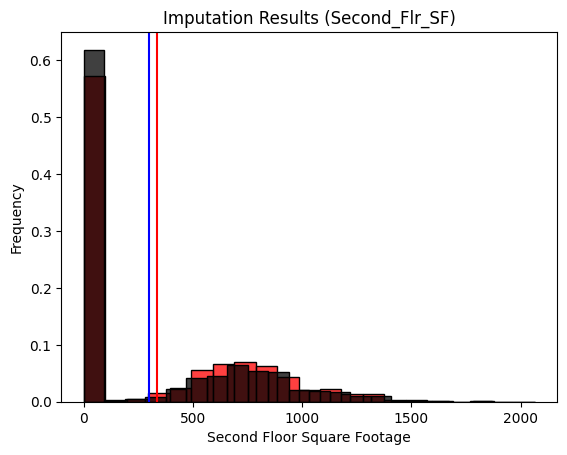

In [69]:
################################
## Second Floor Square Footage ##
################################
# scatterplot AFTER missing values
sns.histplot(data  = housing,
             x     = 'Second_Flr_SF',
             fill  = True,
             color = "red",
             stat  = 'proportion')


# scatterplot BEFORE missing values
sns.histplot(data  = housing_mv,
             x     = 'Second_Flr_SF',
             fill  = True,
             color = 'black',
             stat  = 'proportion')


# mean lines
plt.axvline(housing['Second_Flr_SF'].mean()   , color = "red")
plt.axvline(housing_mv['Second_Flr_SF'].mean(), color = "blue")


# labels and rendering
plt.title (label  = "Imputation Results (Second_Flr_SF)")
plt.xlabel(xlabel = "Second Floor Square Footage")
plt.ylabel(ylabel = "Frequency")
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

The distributions appear to be well aligned before and after imputation. This is ideal as it indicates a minimal "noise" impact, which can occur when a missing value strategy creates a high degree undue variance. Remember, we have no feasible way of checking the true value of each missing data point. Therefore, it is in our best interest to implement a missing value strategy that more or less mimics the original distribution of a feature.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Part II: Transformations</h2><br>
In our previous script, we discovered skewness in several features of the dataset. Let's analyze this further and learn how transformations can be utilized to address this. In this section, we will cover the logarithmic transformation, which helps alleviate positive skewness. The results of this transformation are easy to interpret: model coefficients are read as percentage changes instead of unit changes. Other common transformations include roots and reciprocals.
<br>
<h4>a) Develop a histogram and analyze the distribution of <em>Sale_Price</em>.</h4>

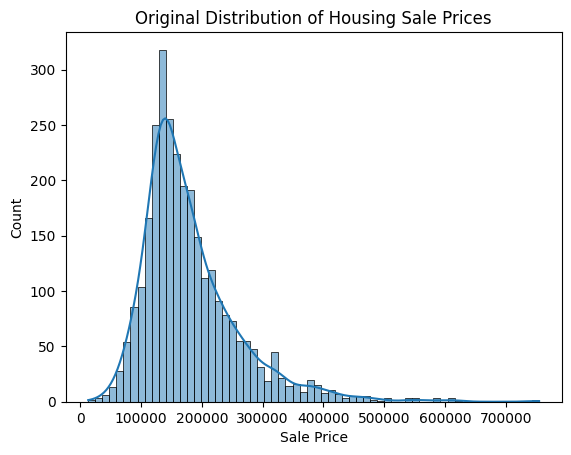

In [70]:
# developing a histogram using HISTPLOT
sns.histplot(data   = housing,
          x      = 'Sale_Price',
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Housing Sale Prices")
plt.xlabel(xlabel = "Sale Price") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

The code below will logarithmically transform <em>Sale_Price</em>.

In [71]:
# documentation: help(np.log1p)

# log transforming Sale_Price and saving it to the dataset
housing['log_Sale_Price'] = np.log1p(housing['Sale_Price'])

<br>
<h4>b) Develop a histogram and analyze the distribution of <em>log_Sale_Price</em>.</h4>

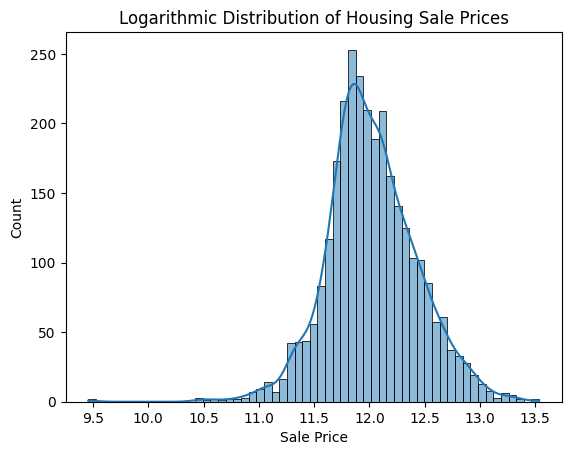

In [72]:
# developing a histogram using HISTPLOT
sns.histplot(data   = housing,
          x      = 'log_Sale_Price',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Housing Sale Prices")
plt.xlabel(xlabel = "Sale Price") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Skewness in Y can indicate skewness in X.</strong> It is likely that since the y-variable was skewed, some of the x-variables will be skewed as well. Run the following code to analyze this further.

In [73]:
housing.skew(axis = 0).round(decimals = 2)

,0
Lot_Area,12.87
Mas_Vnr_Area,2.62
Total_Bsmt_SF,1.15
First_Flr_SF,1.47
Second_Flr_SF,0.87
Gr_Liv_Area,1.27
Garage_Area,0.24
Porch_Area,1.38
Sale_Price,1.74
m_Lot_Area,5.44


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

The skewness results above are misleading as some features are subject to zero inflation (having a large proportion of zero values). Run the modified code below to generate more practical results.

In [74]:
# modified skewness (zero inflation)
for col in housing:
    print(f"""{col}:\t {housing[col][ housing[col] > 0 ].skew(axis = 0).round(decimals = 2)}""")

Lot_Area:	 12.87
Mas_Vnr_Area:	 1.98
Total_Bsmt_SF:	 1.73
First_Flr_SF:	 1.47
Second_Flr_SF:	 0.75
Gr_Liv_Area:	 1.27
Garage_Area:	 0.85
Porch_Area:	 1.59
Sale_Price:	 1.74
m_Lot_Area:	 0.0
m_Mas_Vnr_Area:	 0.0
m_Second_Flr_SF:	 0.0
log_Sale_Price:	 -0.01


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Logarithmically transform any X-features that have an absolute skewness value greater than 1.0.</h4>

In [75]:
# log transforming Lot_Area
housing['log_Lot_Area'] = np.log1p(housing['Lot_Area'])


## Code more below ##
housing['log_Mas_Vnr_Area'] = np.log1p(housing['Mas_Vnr_Area'])
housing['log_Gr_Liv_Area'] = np.log1p(housing['Gr_Liv_Area'])
housing['log_Total_Bsmt_SF'] = np.log1p(housing['Total_Bsmt_SF'])
housing['First_Flr_SF'] = np.log1p(housing['First_Flr_SF'])
housing['log_Porch_Area'] = np.log1p(housing['Porch_Area'])



In [76]:
transtorm(df= housing,
          include=['log_Lot_Area','Mas_Vnr_Area','Sale_Price'])

Normality Improvements (Skewness)
---------------------------------
log_Lot_Area   0.29
Mas_Vnr_Area   2.16
Sale_Price     1.74


,Lot_Area,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Garage_Area,Porch_Area,Sale_Price,m_Lot_Area,m_Mas_Vnr_Area,m_Second_Flr_SF,log_Sale_Price,log_Lot_Area,log_Mas_Vnr_Area,log_Gr_Liv_Area,log_Total_Bsmt_SF,log_Porch_Area
0,31770,1.15,1080,7.41,0.00,1656,528,272,0.63,0,0,0,12.28,2.74,4.73,7.41,6.99,5.61
1,11622,-0.80,882,6.80,0.00,896,730,260,-1.13,0,0,0,11.56,0.51,0.00,6.80,6.78,5.56
2,14267,1.14,1329,7.19,0.00,1329,312,429,0.08,0,0,0,12.06,0.94,4.69,7.19,7.19,6.06
3,11160,-0.80,2110,7.65,0.00,2110,522,0,0.94,0,1,0,12.40,0.43,0.00,7.65,7.65,0.00
4,13830,-0.80,928,6.83,701.00,1629,482,246,0.33,0,0,0,12.15,0.88,0.00,7.40,6.83,5.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,7937,-0.80,1003,6.91,0.00,1003,588,120,-0.38,0,0,0,11.87,-0.26,0.00,6.91,6.91,4.80
2926,8885,-0.80,864,6.81,0.00,902,484,164,-0.59,0,0,0,11.78,-0.03,0.00,6.81,6.76,5.11
2927,10441,-0.80,912,6.88,0.00,970,0,112,-0.57,0,0,0,11.79,0.29,0.00,6.88,6.82,4.73
2928,10010,-0.80,1389,7.24,0.00,1389,418,278,0.05,0,0,0,12.04,0.21,0.00,7.24,7.24,5.63


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>d) Run the codes below and analyze the results of each logarithmic transformation.</h4><br>

In [77]:
# skewness BEFORE logarithmic transformations
housing.loc[ : , :'Sale_Price' ].skew(axis = 0).round(decimals = 2).sort_index(ascending = False)

,0
Total_Bsmt_SF,1.15
Second_Flr_SF,0.87
Sale_Price,1.74
Porch_Area,1.38
Mas_Vnr_Area,2.62
Lot_Area,12.87
Gr_Liv_Area,1.27
Garage_Area,0.24
First_Flr_SF,0.06


<br>

In [78]:
# skewness AFTER logarithmic transformations
housing.loc[ : , 'log_Sale_Price': ].skew(axis = 0).round(decimals = 2).sort_index(ascending = False)

,0
log_Total_Bsmt_SF,-4.94
log_Sale_Price,-0.01
log_Porch_Area,-1.36
log_Mas_Vnr_Area,0.54
log_Lot_Area,-0.47
log_Gr_Liv_Area,0.01


<br>

In [79]:
# analyzing (Pearson) correlations
df_corr = housing.corr(method = 'pearson').round(2)

df_corr.loc[ : , ['Sale_Price', 'log_Sale_Price'] ].sort_values(by = 'Sale_Price',
                                                                ascending = False)

,Sale_Price,log_Sale_Price
Sale_Price,1.00,0.95
log_Sale_Price,0.95,1.00
Gr_Liv_Area,0.71,0.70
log_Gr_Liv_Area,0.70,0.72
Garage_Area,0.64,0.65
Total_Bsmt_SF,0.63,0.63
First_Flr_SF,0.61,0.61
Mas_Vnr_Area,0.50,0.44
log_Mas_Vnr_Area,0.44,0.43
Porch_Area,0.38,0.39


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Some of the transformations resulted in lower correlations. Even so, we are in better shape than before as we are more aligned with the assumptions of linear modeling. If nothing else, we have more options, giving us flexibility while navigating the many statistical schools of thought (beyond the scope of this course).
<br>
<h4>e) Develop a histogram for each logarithmic feature that resulted in a lower correlation with the response variables.</h4><br>
We will discuss these distributions in more detail in a later script.

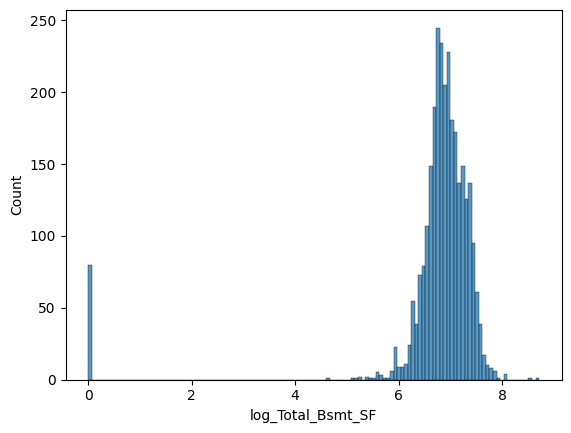

In [80]:
## Code Here ##
sns.histplot(data= housing,
             x='log_Total_Bsmt_SF')
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Let's take a moment to observe the effect of transformations on our modeling efforts. The codes below compare the original and logarithmic forms of <em>Sale_Price</em> and <em>Lot_Area</em>.

In [81]:
## Original Y and Original X ##

# INSTANTIATING a model type
lm_price_qual = smf.ols(formula = """Sale_Price ~ Lot_Area""",
                        data = housing)


# telling Python to FIT the data to the blueprint
results = lm_price_qual.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     229.0
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           7.30e-50
Time:                        23:47:06   Log-Likelihood:                -37122.
No. Observations:                2930   AIC:                         7.425e+04
Df Residuals:                    2928   BIC:                         7.426e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.531e+05   2315.962     66.119      0.0

<br>

In [82]:
## Log Y and Original X ##

# INSTANTIATING a model type
lm_price_qual = smf.ols(formula = """log_Sale_Price ~ Lot_Area""",
                        data = housing)


# telling Python to FIT the data to the blueprint
results = lm_price_qual.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         log_Sale_Price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           1.18e-45
Time:                        23:47:06   Log-Likelihood:                -1426.6
No. Observations:                2930   AIC:                             2857.
Df Residuals:                    2928   BIC:                             2869.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.8859      0.012   1002.601      0.0

<br>

In [83]:
## Original Y and Log X ##

# INSTANTIATING a model type
lm_price_qual = smf.ols(formula = """Sale_Price ~ log_Lot_Area""",
                        data = housing)


# telling Python to FIT the data to the blueprint
results = lm_price_qual.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     465.3
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           6.71e-96
Time:                        23:47:06   Log-Likelihood:                -37016.
No. Observations:                2930   AIC:                         7.404e+04
Df Residuals:                    2928   BIC:                         7.405e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.486e+05   2.46e+04    -14.183   

<br>

In [84]:
## Log Y and Log X ##

# INSTANTIATING a model type
lm_price_qual = smf.ols(formula = """log_Sale_Price ~ log_Lot_Area""",
                        data = housing)


# telling Python to FIT the data to the blueprint
results = lm_price_qual.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         log_Sale_Price   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     475.3
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           8.98e-98
Time:                        23:47:06   Log-Likelihood:                -1306.9
No. Observations:                2930   AIC:                             2618.
Df Residuals:                    2928   BIC:                             2630.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.2949      0.125     74.220   

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Team Challenge</h2>

<h4>Develop one optimal linear model for each version of the response variable (&nbsp;<em>Sale_Price</em> and <em>log_Sale_Price</em>&nbsp;).</h4>

* Use p-values as your feature significance criteria (&nbsp;<em>p</em> $\le$ 0.05&nbsp;).
* Optimize the model based on adjusted R-squared (<em>&nbsp;Adj. R-squared&nbsp;</em>).

In [85]:
# preparing x-data
x_all = housing.drop([ 'Sale_Price', 'log_Sale_Price' ], axis = 1)


# preparing y-data
original_y = housing[ 'Sale_Price' ]
log_y      = housing[ 'log_Sale_Price' ]

<br>

In [86]:
# checking documentation
help(quick_lm)

Help on function quick_lm in module baserush.optimize:

quick_lm(x_data: 'pd.DataFrame', y_data: 'Union[pd.Series, np.ndarray, List[float]]', force_in: 'list' = None, threshold_in: 'float' = 0.01, threshold_out: 'float' = 0.05, max_iter: 'int' = 100, verbose: 'bool' = True, tts: 'bool' = True, test_size: 'float' = 0.45, max_gap: 'float' = 0.05, random_state: 'int' = 702) -> 'List[str]'
    Builds a linear model using stepwise feature selection based on
    p-values, returning a list of optimal x-features.

    PARAMETERS
    ----------
    x_data : pandas.DataFrame
        DataFrame with candidate features.
    y_data : array-like
        The target variable.
    force_in : list
        X-feature(s) to force into the model.
    threshold_in : float
        Include a feature if its p-value < threshold_in.
    threshold_out : float
        Exclude a feature if its p-value > threshold_out.
    verbose : bool
        Whether to print the sequence of inclusions and exclusions.
    tts : boo

<br>

In [87]:
## stepwise model using Sale_Price ##
sp_model = quick_lm(x_data        = x_all,
                    y_data        = original_y,
                    threshold_in  = 0.01,
                    threshold_out = 0.05,
                    test_size     = 0.25)

Add Total_Bsmt_SF                  with p-value 0.000000
Add Gr_Liv_Area                    with p-value 0.000000
Add Garage_Area                    with p-value 0.000000
Add Mas_Vnr_Area                   with p-value 0.000000
Add log_Porch_Area                 with p-value 0.000000

Iterations: 5 | Features: 5 | Train-Test Gap: 0.0714 | WARNING: GAP EXCEEDED


<br>

In [88]:
## stepwise model using log_Sale_Price ##
log_sp_model = quick_lm(x_data        = x_all,
                        y_data        = log_y,
                        threshold_in  = 0.01,
                        threshold_out = 0.05,
                        test_size     = 0.25)

Add Gr_Liv_Area                    with p-value 0.000000
Add Garage_Area                    with p-value 0.000000
Add Total_Bsmt_SF                  with p-value 0.000000
Add log_Gr_Liv_Area                with p-value 0.000000
Add log_Porch_Area                 with p-value 0.000000
Add log_Mas_Vnr_Area               with p-value 0.000000
Add Second_Flr_SF                  with p-value 0.000407
Add First_Flr_SF                   with p-value 0.000000
Add Mas_Vnr_Area                   with p-value 0.009704

Iterations: 9 | Features: 9 | Train-Test Gap: 0.0103 | PASS


In [89]:
log_sp_model['selected_features']

['Gr_Liv_Area',
 'Garage_Area',
 'Total_Bsmt_SF',
 'log_Gr_Liv_Area',
 'log_Porch_Area',
 'log_Mas_Vnr_Area',
 'Second_Flr_SF',
 'First_Flr_SF',
 'Mas_Vnr_Area']

<br><br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

~~~

  _   _ _                                             
 | \ | (_)                                            
 |  \| |_  ___ ___                                    
 | . ` | |/ __/ _ \                                   
 | |\  | | (_|  __/                                   
 |_| \_|_|\___\___|    _                              
 \ \        / /       | |                             
  \ \  /\  / /__  _ __| | __                          
   \ \/  \/ / _ \| '__| |/ /                          
    \  /\  / (_) | |  |   <                           
  ___\/_ \/ \___/|_|  |_|\_\_               _       _
 |  ____|                  | |             | |     | |
 | |____   _____ _ __ _   _| |__   ___   __| |_   _| |
 |  __\ \ / / _ \ '__| | | | '_ \ / _ \ / _` | | | | |
 | |___\ V /  __/ |  | |_| | |_) | (_) | (_| | |_| |_|
 |______\_/ \___|_|   \__, |_.__/ \___/ \__,_|\__, (_)
                       __/ |                   __/ |  
                      |___/                   |___/   
                                                                    
~~~

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Bonus: Additional Tools</h2>

Looking to speed up missing value imputations and skewness transformations? Check out <strong>simputer</strong> and <strong>transtorm</strong> in the preprocessing module of BaseRush!

In [90]:
import baserush.preprocess as bp

<br>

In [91]:
help(bp.simputer)

Help on function simputer in module baserush.preprocess:

simputer(df: 'ArrayLike', include: 'Optional[Sequence[str]]' = None, strategy: 'str' = 'mean', fill_value: 'Optional[Any]' = None, add_indicator: 'bool' = False, return_imputer: 'bool' = False) -> 'Union[pd.DataFrame, Tuple[pd.DataFrame, SimpleImputer]]'
    Imputes missing values on numeric columns (default: mean). Available
    strategies include: 'mean'|'median'|'most_frequent'|'constant'.

    PARAMETERS
    ----------
    df : DataFrame
        DataFrame containing features to be imputed.
    include : list-like
        Optional subset of features to impute.
    strategy : str
        Imputation strategy to apply.
    fill_value : numeric
        Fill value if strategy='constant'
    add_indicator : bool
        Binary flag feature identifying values that were originally missing.
    return_imputer : bool
        Whether to also return a fitted imputer object.

    RETURNS
    -------
    DataFrame (and optionally fitted im

<br>

In [92]:
help(bp.transtorm)

Help on function transtorm in module baserush.preprocess:

transtorm(df: 'ArrayLike', include: 'Optional[Sequence[str]]' = None, verbose: 'bool' = True, standardize: 'bool' = True, return_transformer: 'bool' = False) -> 'Union[pd.DataFrame, Tuple[pd.DataFrame, PowerTransformer]]'
    Performs a Yeo-Johnson transformation on numeric features to reduce
    skewness.

    PARAMETERS
    ----------
    df : DataFrame
        Sata to be transformed.
    include : list-like
        Features to transform.
    verbose : bool
        Whether to print a summary of the results.
    standardize : bool
        Whether to standardize each feature before transforming.
    return_transformer : bool
        Whether to also return a fitted scaler object.

    RETURNS
    -------
    DataFrame (and optionally fitted transformer object)



<br>